In [2]:
import pandas as pd
from pandas import DataFrame
from tableone import TableOne, load_dataset
import matplotlib.pyplot as plt

In [3]:
# Step 1 Load data set into pyhton 
df = pd.read_csv("data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2016.csv")
# Step 2 : Getting a DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False., looking into why
df.columns[10]
print(df.columns[10])
# Step 3 Changing the value from "120+" to "120" so we can convert the column to an int 
df = df.replace("120 +", "120")
# Step 4 converting column 10 into int 
df = df.astype({'Length of Stay':'int'})
print(df["Length of Stay"].dtype)


/var/folders/5_/rgf1cyc939xgxsgb2ws76l2h0000gn/T/ipykernel_64401/710188164.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2016.csv")


Length of Stay
int64


Text(0.5, 1.0, 'Hospital Inpatient Discharges Grouped by Age')

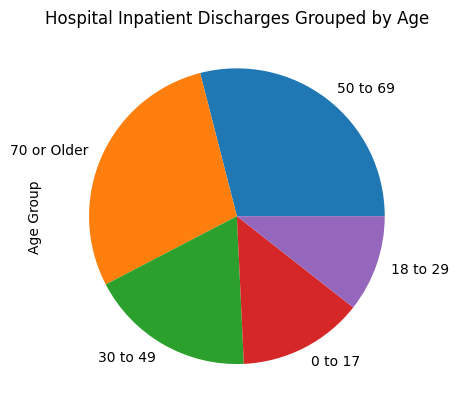

In [7]:
counts = df["Age Group"].value_counts()
# print the counts
pie_chart = counts.plot(kind='pie')
# set the title
pie_chart.set_title("Hospital Inpatient Discharges Grouped by Age")


Text(0.5, 1.0, 'Hospital Inpatient Discharges Grouped by Gender')

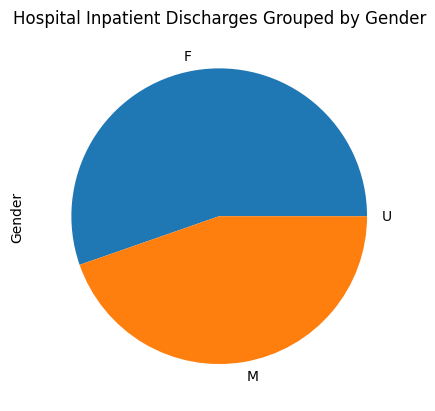

In [11]:
counts = df["Gender"].value_counts()
# print the counts
pie_chart = counts.plot(kind='pie')
# set the title
pie_chart.set_title("Hospital Inpatient Discharges Grouped by Gender")

Text(0.5, 1.0, 'Hospital Inpatient Discharges Grouped by Race')

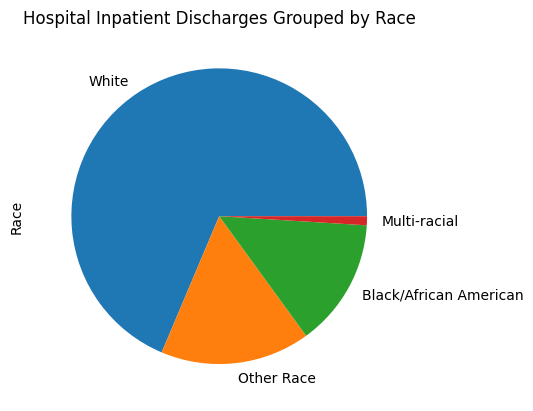

In [12]:
counts = df["Race"].value_counts()
# print the counts
pie_chart = counts.plot(kind='pie')
# set the title
pie_chart.set_title("Hospital Inpatient Discharges Grouped by Race")

In [40]:
# Tableone 
#list of columns to be included in Table 1:
columns = ['Length of Stay','Discharge Year','CCS Diagnosis Code','CCS Procedure Code', 'Race','Age Group','Gender','Ethnicity']
categorical = ['Race','Age Group','Gender','Ethnicity']
groupby = ['Type of Admission']
nonnormal = ['Age Group']
mytable = TableOne(df, columns=columns, categorical=categorical, groupby=groupby, pval=False)
mytable.tabulate(tablefmt = "html")

In [29]:
#what is the correlation btw total cost and length of stay 
column_1 = df['Length of Stay']
column_2 = df['Total Costs']
column_1.corr(column_2)


0.7141816779231337

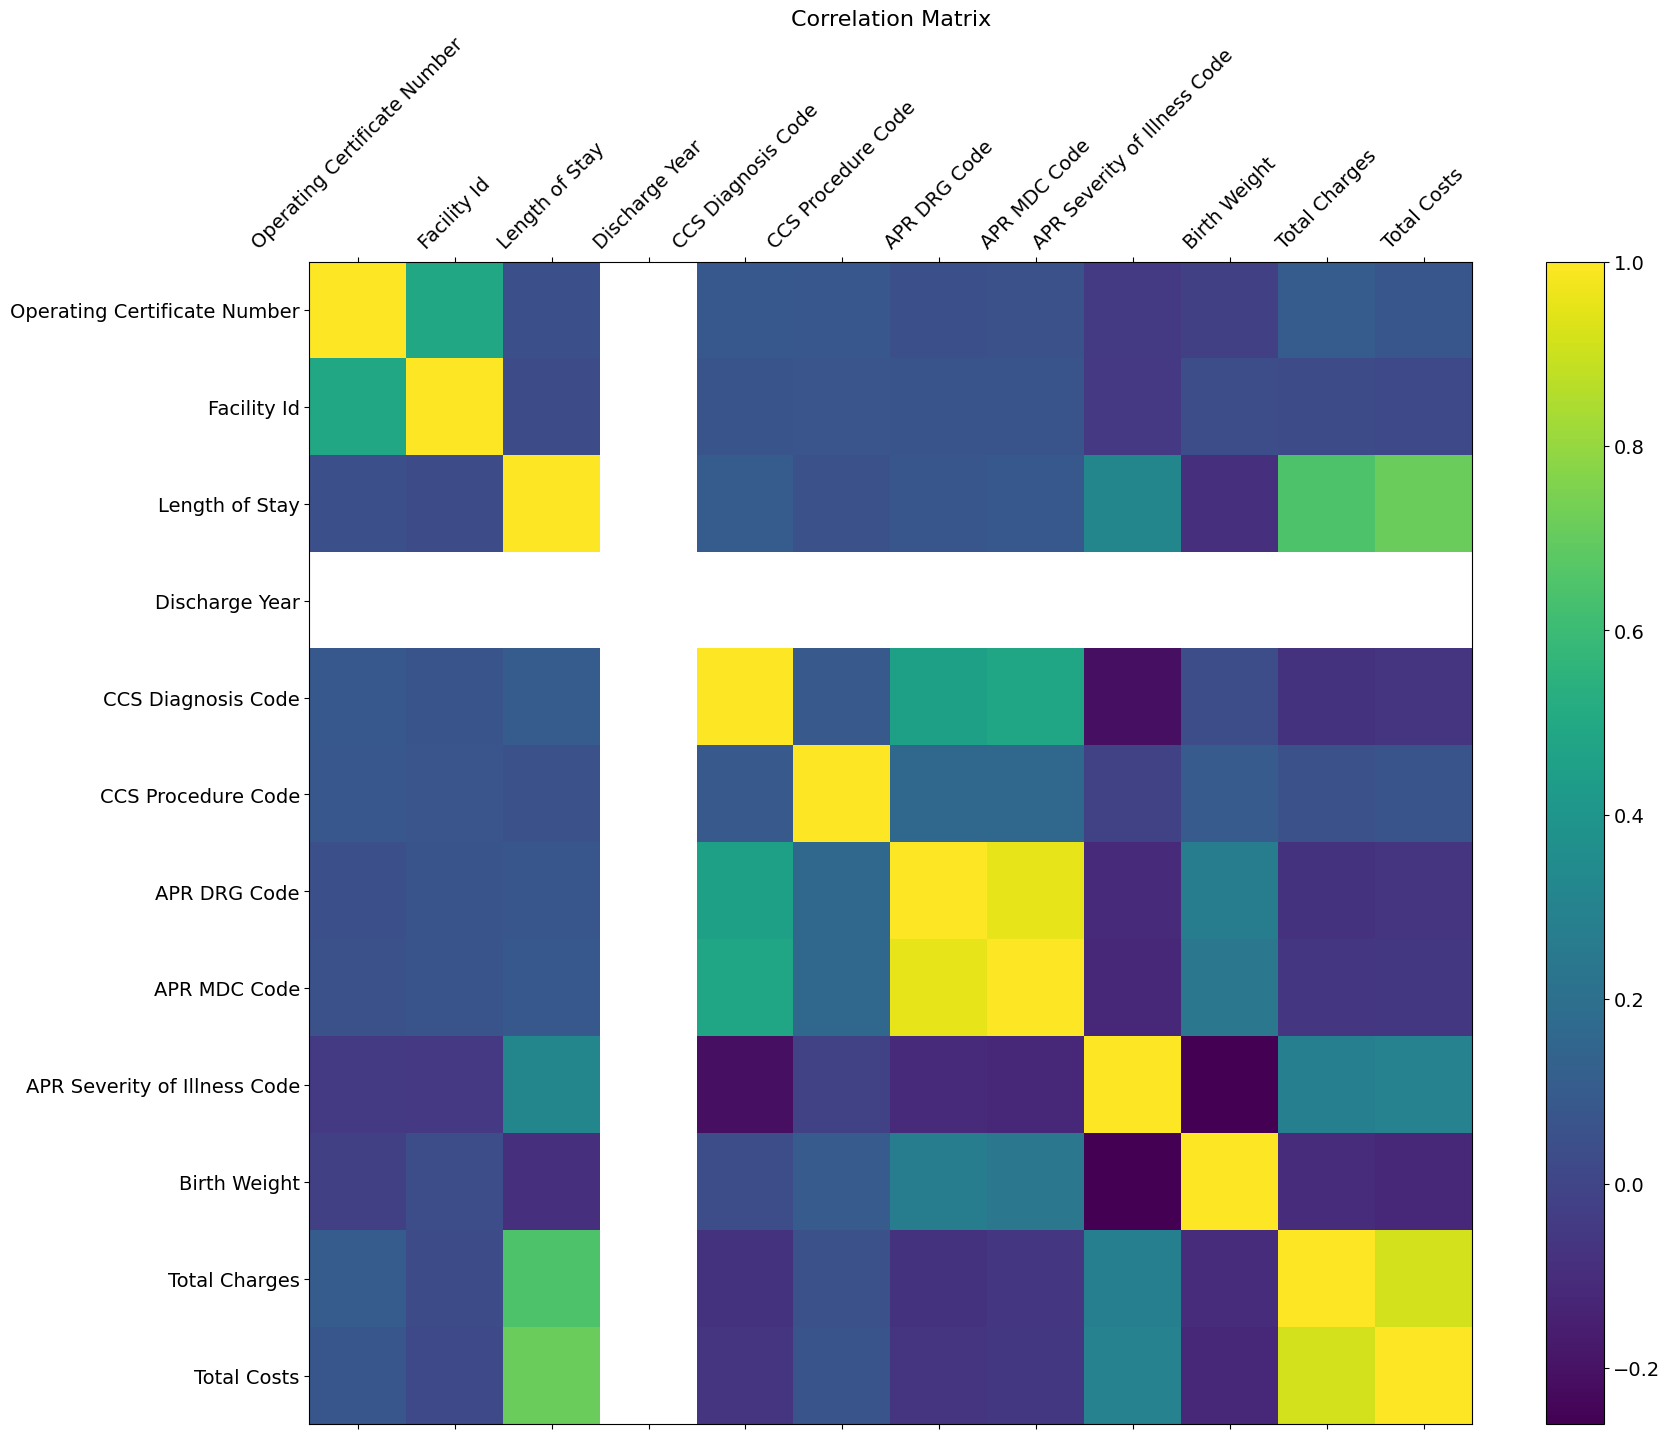

In [39]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);